### Gather Data

- collect data from the .csv file provided in the classroom.

In [1]:
import pandas as pd

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- download the image-predictions.tsv file programatically using the Requests package.

In [4]:
import requests

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
import os

In [7]:
file_name = url.split('/')[-1] # we split our url on the slash and get the last element in the generated list.

In [8]:
if not os.path.isfile(file_name):
   with open(file_name, mode='wb') as file:
        file.write(response.content)

In [9]:
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- collect additional data about the tweets from Twitter API using the tweepy package.

- I used the `twitter-api` ,`tweet_json.txt` provided in the classroom due to some problems with my verification with tweeter developer configurations for saving my time.

- I have read the `twitter-api` code very well and I understood everything in it and that it aims to configure the twitter api object using the credentials provided then, the code starts to pull the tweets from the Api using tweepy library using the tweets ids provided from the tweets-archive-enhanced.csv file to get the `retweet-count`  and the `favorite-count` fields about these specific tweets to help us in the analysis by providing more useful data to be used.

- Also, I grasped the code trick to handle the `deleted-tweets` from the api that are no longer available which was a technique similar to that was used in the classroom when the `instructor tried to add these deleted images manually`.

- I promise to practice on this kind of data gathering after passing my project god-willing :)

##### Please, Don't Run the `next cell` for `the reason` that I explained in `this cell` !

In [ ]:
# here, i used `Copy-Paste` method for the twitter Api authentication step beacuse i didn't get my credentials.
# In this cell, i used the `twitter-api` file provided in the classroom - I didn't run this cell!
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [11]:
# I aim here to extract each line dumped in the `tweet_json.txt` file to be loaded as json data to build my dataframe.
# I needed to extract the expanded url of the tweet media (i.e image) --if exists--

import json

df_tweets = []
tweets_with_no_entities = []
with open('tweet_json.txt', mode='r') as file:
     for each_line in file:
         json_tweet = json.loads(each_line)
#          print(json_tweet)
#          break
         try:
            temp = json_tweet['entities']['media'][0]['expanded_url']
            df_tweets.append({'tweet_id':json_tweet['id'],
                              'retweet_count':json_tweet['retweet_count'], 
                              'favorite_count':json_tweet['favorite_count'], 
                              'expanded_url': temp
                            })
         except Exception as e:
                 tweets_with_no_entities.append((json_tweet['id'], e))
                              
#          print(df_tweets) # to test that the json data loading works properly.
df_tweets_api = pd.DataFrame(df_tweets)
tweets_with_no_entities

[(886267009285017600, KeyError('media')),
 (886054160059072513, KeyError('media')),
 (885518971528720385, KeyError('media')),
 (884247878851493888, KeyError('media')),
 (881633300179243008, KeyError('media')),
 (879674319642796034, KeyError('media')),
 (879130579576475649, KeyError('media')),
 (878604707211726852, KeyError('media')),
 (878404777348136964, KeyError('media')),
 (878316110768087041, KeyError('media')),
 (876537666061221889, KeyError('media')),
 (875097192612077568, KeyError('media')),
 (874434818259525634, KeyError('media')),
 (873337748698140672, KeyError('media')),
 (872668790621863937, KeyError('media')),
 (871166179821445120, KeyError('media')),
 (871102520638267392, KeyError('media')),
 (870726314365509632, KeyError('media')),
 (869988702071779329, KeyError('media')),
 (868639477480148993, KeyError('media')),
 (866816280283807744, KeyError('media')),
 (866720684873056260, KeyError('media')),
 (866094527597207552, KeyError('media')),
 (863471782782697472, KeyError('me

In [12]:
len(tweets_with_no_entities)

281

In [13]:
df_image_predictions.shape, df_tweets_api.shape

((2075, 12), (2073, 4))

###  I could realize from the`previous cell` that the `281 image predictions that are missed` from `the image_predictions` table is due to the absence of any media(i.e. no images) associated with these tweets.

In [14]:
df_tweets_api
df_tweets_api[df_tweets_api.tweet_id == 878604707211726852]

,tweet_id,retweet_count,favorite_count,expanded_url


In [15]:
df_archive[df_archive.tweet_id == 790723298204217344]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
664,790723298204217344,NaN,NaN,2016-10-25 01:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Happy. He's a bathtub r...,7.899865e+17,4.196984e+09,2016-10-23 00:27:05 +0000,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,None,None,None,None


In [16]:
df_tweets_api.head()

,tweet_id,retweet_count,favorite_count,expanded_url
0,892420643555336193,8853,39467,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,6514,33819,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,4328,25461,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,8964,42908,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,9774,41048,https://twitter.com/dog_rates/status/891327558...


In [17]:
df_tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2073 non-null   int64 
 1   retweet_count   2073 non-null   int64 
 2   favorite_count  2073 non-null   int64 
 3   expanded_url    2073 non-null   object
dtypes: int64(3), object(1)
memory usage: 64.9+ KB


###  by this previous step, I could finish the data gathering step of the project.
--------------------------------------------------------------------------------------------
- 1st dataframe is called: `df_tweets`

- 2st dataframe is called: `df_image_predictions`

- 3st dataframe is called: `df_tweets_api`

### Assess Data

To help in the data assessing `visually`, I used Google Sheets and a text editor to help in detecting issues.

In [18]:
df_tweets_api.to_csv('df_tweets_api_csv')

#### Quality Issues: (Content-Related):
---------------------------------------

`df_archive`: 

- There exist many tweets in the table that are retweets or replies that we should filter out to satisfy our project requirments.

- So many missing dog stage data about `doggo`, `floofer`, `pupper`, `puppo`.

- `expanded_urls` in many records in the dataset has a tweet id [../status/ -here- ] that is different from that tweet id of that record like: records # 37(/4bonds2carbon/status/), 74(/bbcworld/status/), 90(/drboondoc/status/) and many others.

- `expanded_urls` have multiple `identical` (repeated) urls separated with commas(,) .

- `expanded_urls` in some records have no value at all.

- many NaNs at the column: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_timestamp`, `retweeted_status_user_id` (Normal situation because some tweets are replies and/or retweets) so that this field will be empty.

- `name` column has strange or weird values like: 'None', 'a', 'an', 'the', 'not' + many original tweets have no `name` value at all like tweet # 27.

- `rating_denominator` in some tweets has a strange values much greater than [ 10 ] which is defined for the unique rating system that is a big part of the popularity of WeRateDogs. this can be detected visually and programatically.

- Extremely Much `Null values` in the columns `doggo`, `floofer`, `pupper`, `puppo` . [can be resolved by changing the structure of the df_archive table .]

- `timestamp` column has incorrect datatype (object); it should be of a datetime datatype.

- there exist `non-original` tweets (`retweets` and/or `replies`) for another tweets that violate the requirments of the project for analysis detected through visually through `RT` and `@` charaters in the tweet text.

- `source` column has an object datatype, but it should be a `categorical` datatype.

- `source` column has non descriptive name, it should be like: `source_tweet` for example.


`df_image_predictions`:

- non describtive column names for `p1`, `p1_conf`, `p1_dog` and so on for p2,p3.

- there are missing image predictions for 281 tweets which is the difference in no_rows between df_archive table and the df_image_predictions table . this problem can't be solved because we have no access on the neural network algorithm.


#### Tidness Issues: (Structure-Related):
---------------------------------------

`df_archive`: 

- `doggo`, `floofer`, `pupper`, `puppo` represent values of a single variable which is: `dog_stage`, but they appear separated in multiple columns.


`df_tweets_api`:

- `retweet_count`, `favorite_count` columns should be part of the df_archive table as they belong to the data/features of the tweet.

In [19]:
df_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [20]:
df_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [21]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
df_image_predictions.tweet_id.duplicated().sum()

0

In [24]:
df_image_predictions.shape, df_archive.shape

((2075, 12), (2356, 17))

In [25]:
2356-2075

281

In [26]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1764,826476773533745153,https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg,1,German_shepherd,0.741860,True,Tibetan_mastiff,0.122812,True,kelpie,0.100460,True
897,699775878809702401,https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg,1,Dandie_Dinmont,0.271683,True,Old_English_sheepdog,0.164931,True,otterhound,0.105918,True
1700,817056546584727552,https://pbs.twimg.com/media/C1bEl4zVIAASj7_.jpg,1,kelpie,0.864415,True,French_bulldog,0.097456,True,German_shepherd,0.008526,True
1257,748575535303884801,https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg,1,muzzle,0.176172,False,seat_belt,0.160953,False,soft-coated_wheaten_terrier,0.086499,True
664,682697186228989953,https://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg,1,bald_eagle,0.097232,False,torch,0.096621,False,cliff,0.090385,False
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,True,basset,0.006418,True,Walker_hound,0.003533,True
30,666418789513326592,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True
1719,819227688460238848,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,1,Border_terrier,0.482452,True,German_shepherd,0.181082,True,Norwegian_elkhound,0.065257,True
1197,740676976021798912,https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg,1,wombat,0.462952,False,Norwegian_elkhound,0.275225,True,Siamese_cat,0.043559,False
636,681242418453299201,https://pbs.twimg.com/media/CXRCXesVAAArSXt.jpg,1,motor_scooter,0.255934,False,rifle,0.145202,False,assault_rifle,0.097000,False


In [27]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
df_image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
cliff                   1
polecat                 1
quilt                   1
ibex                    1
candle                  1
Name: p1, Length: 378, dtype: int64

In [29]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [30]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [31]:
df_archive[df_archive.rating_denominator>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [32]:
df_archive[df_archive.name == "not"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405...,10,10,not,None,None,None,None


In [33]:
df_tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2073 non-null   int64 
 1   retweet_count   2073 non-null   int64 
 2   favorite_count  2073 non-null   int64 
 3   expanded_url    2073 non-null   object
dtypes: int64(3), object(1)
memory usage: 64.9+ KB


In [34]:
df_tweets_api.tweet_id.duplicated().sum()

0

In [35]:
df_image_predictions[df_image_predictions.tweet_id == 875021211251597312]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1997,875021211251597312,https://pbs.twimg.com/media/DCSzF3NVoAAPzT4.jpg,2,West_Highland_white_terrier,0.714319,True,Siberian_husky,0.091913,True,Great_Pyrenees,0.046038,True


In [36]:
df_archive[df_archive.tweet_id == 878599868507402241]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
df_tweets_api.tweet_id.values[975]

720340705894408192

In [38]:
set1 = set(df_image_predictions.tweet_id)
set2 = set(df_archive.tweet_id)
set1.difference(set2)

set()

In [39]:
id1 = df_image_predictions.tweet_id.values[800]

In [40]:
df_archive[df_archive.tweet_id==id1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1511,691416866452082688,NaN,NaN,2016-01-25 00:26:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I present to you... Dog Jesus. 13/10 (he could...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None


In [41]:
df_archive.iloc[324:325, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
324,834086379323871233,NaN,NaN,2017-02-21 17:04:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lipton. He's a West Romanian Snuggle P...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834086379...,12,10,Lipton,None,None,None,None


### Clean Data

#### start cleaning process by copying all our collected data.

In [469]:
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_api_clean = df_tweets_api.copy()

### As mentioned in the classroom that starting with the structural (tidness) issues `first` will facilitate our mission with the quality issues much.

#### Tidness Issues Cleaning:

##### Define:
`df_archive` table: 

- Melt the 4 columns `doggo`, `floofer`, `pupper`, `puppo` in one column to be called `dog_stage`.

##### Code:

In [470]:
import numpy as np
new_col = np.repeat('None', df_archive_clean.shape[0])

In [471]:
df_archive_clean['other_col'] = new_col

In [472]:
indices_selected = df_archive_clean[(df_archive_clean.doggo=='None') & (df_archive_clean.floofer=='None') & (df_archive_clean.pupper=='None') & (df_archive_clean.puppo=='None')]

In [473]:
df_archive_clean.columns
indices_selected

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,other_col
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,None


In [474]:
df_archive_clean.loc[indices_selected.index.tolist(), 'other_col'] = 'other'

In [475]:
df_archive_clean[200:260][:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,other_col
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,None
201,853760880890318849,NaN,NaN,2017-04-17 00:03:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Alice. I'm told she enjoys car ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853760880...,12,10,Alice,None,None,None,None,other
202,853639147608842240,NaN,NaN,2017-04-16 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",A photographer took pictures before and after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853639147...,13,10,None,None,None,None,None,other
203,853299958564483072,NaN,NaN,2017-04-15 17:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rumpole. He'll be your Uber driver thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853299958...,13,10,Rumpole,None,None,None,None,other
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None,other
205,852912242202992640,NaN,NaN,2017-04-14 15:51:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benny. He likes being adorable and making...,NaN,NaN,NaN,"https://www.gofundme.com/bennys-medical-bills,...",12,10,Benny,None,None,None,None,other
206,852672615818899456,NaN,NaN,2017-04-13 23:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. She's never tasted a stick so s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852672615...,12,10,Aspen,None,None,None,None,other
207,852553447878664193,NaN,NaN,2017-04-13 16:05:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jarod. He likes having his belly brush...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,None,None,None,None,other
208,852311364735569921,NaN,NaN,2017-04-13 00:03:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wiggles. She would like you to spot he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852311364...,13,10,Wiggles,None,None,None,None,other
209,852226086759018497,NaN,NaN,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852226086...,14,10,General,None,None,None,None,other


In [476]:
#df_archive_clean[20:30][:]
list_cols = list(df_archive_clean.columns)[:-5]
df_archive_clean = pd.melt(df_archive_clean, id_vars=list_cols, var_name='dog_stage', value_name='value_stage')

In [477]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'value_stage'],
      dtype='object')

In [478]:
df_archive_clean.shape

(11780, 15)

In [479]:
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,value_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11775,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,other_col,other
11776,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,other_col,other
11777,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,other_col,other
11778,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,other_col,other


In [480]:
df_archive_clean[300:500][:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,value_stage
300,836753516572119041,NaN,NaN,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo,doggo
301,836677758902222849,NaN,NaN,2017-02-28 20:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836677758...,11,10,Oliver,doggo,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,doggo,None
303,836397794269200385,NaN,NaN,2017-02-28 02:09:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. He ran into a gl...,8.178278e+17,4.196984e+09,2017-01-07 20:18:46 +0000,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,doggo,None
304,836380477523124226,NaN,NaN,2017-02-28 01:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She just blasted off. Streamline ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836380477...,12,10,Ava,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,813172488309972993,NaN,NaN,2016-12-26 00:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eleanor. She winks like she knows many...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813172488...,12,10,Eleanor,doggo,None
496,813157409116065792,NaN,NaN,2016-12-25 23:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Layla. It is her first Christmas. She ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813157409...,12,10,Layla,doggo,None
497,813142292504645637,NaN,NaN,2016-12-25 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813142292...,13,10,None,doggo,None
498,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been informed by multiple sources that th...,NaN,NaN,NaN,NaN,12,10,None,doggo,None


In [481]:
df_archive_clean = df_archive_clean[df_archive_clean.value_stage != 'None']

In [482]:
df_archive_clean[300:500][:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,value_stage
6395,681694085539872773,NaN,NaN,2015-12-29 04:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a Benedoop Cumbersnatch. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,pupper,pupper
6396,681679526984871937,NaN,NaN,2015-12-29 03:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can you spot Toby the guilty pupper? 7/10 woul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681679526...,7,10,None,pupper,pupper
6397,681654059175129088,NaN,NaN,2015-12-29 01:52:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681654059...,12,10,Toffee,pupper,pupper
6409,681231109724700672,NaN,NaN,2015-12-27 21:52:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this pic. 11/10 this pupper is goi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681231109...,11,10,None,pupper,pupper
6417,680836378243002368,NaN,NaN,2015-12-26 19:43:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She's secretly ferocious. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680836378...,12,10,Ellie,pupper,pupper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9544,869702957897576449,NaN,NaN,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957...,13,10,Stanley,other_col,other
9546,869227993411051520,NaN,NaN,2017-05-29 16:24:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gizmo. His favorite thing is standing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869227993...,13,10,Gizmo,other_col,other
9547,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,other_col,other
9548,868639477480148993,NaN,NaN,2017-05-28 01:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,other_col,other


In [483]:
df_archive_clean.dog_stage.str.replace('other_col', 'None')

9        doggo
43       doggo
99       doggo
108      doggo
110      doggo
         ...  
11775     None
11776     None
11777     None
11778     None
11779     None
Name: dog_stage, Length: 2370, dtype: object

In [484]:
df_archive_clean.dog_stage.value_counts()

other_col    1976
pupper        257
doggo          97
puppo          30
floofer        10
Name: dog_stage, dtype: int64

In [485]:
1976+30+10+97+257

2370

In [486]:
df_archive_clean.dog_stage = df_archive_clean.dog_stage.str.replace('other_col', 'None')

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [487]:
df_archive_clean.dog_stage.value_counts()

None       1976
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [488]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [489]:
df_archive_clean.drop('value_stage', axis=1, inplace=True)

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##### Test

In [490]:
df_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo


In [491]:
df_archive[df_archive.tweet_id == 884162670584377345]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None


##### Define:

- `df_tweets_api_clean` table: Merge the two columns `retweet_count`, `favorite_count` with the df_archive_clean

In [492]:
df_image_predictions_clean = df_image_predictions.copy()
len(set(df_archive_clean.tweet_id).difference(set(df_tweets_api_clean.tweet_id)))

283

In [493]:
df_archive_clean = pd.merge(df_archive_clean, df_tweets_api_clean, on=['tweet_id'], how = 'inner')

In [494]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'expanded_url'],
      dtype='object')

In [495]:
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467,https://twitter.com/dog_rates/status/890240255...
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,3128,20771,https://twitter.com/dog_rates/status/884162670...
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,5669,28031,https://twitter.com/dog_rates/status/872967104...
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,3628,20730,https://twitter.com/dog_rates/status/871515927...
4,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,3327,16476,https://twitter.com/dog_rates/status/869596645...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,41,111,https://twitter.com/dog_rates/status/666049248...
2082,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,147,311,https://twitter.com/dog_rates/status/666044226...
2083,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,47,128,https://twitter.com/dog_rates/status/666033412...
2084,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,48,132,https://twitter.com/dog_rates/status/666029285...


In [496]:
df_tweets_api_clean[df_tweets_api_clean.tweet_id==892420643555336193]

,tweet_id,retweet_count,favorite_count,expanded_url
0,892420643555336193,8853,39467,https://twitter.com/dog_rates/status/892420643...


In [497]:
df_archive_clean[df_archive_clean.tweet_id == 872261713294495745].expanded_urls.value_counts()

https://twitter.com/dog_rates/status/872261713294495745/photo/1,https://twitter.com/dog_rates/status/872261713294495745/photo/1    1
Name: expanded_urls, dtype: int64

In [498]:
df_archive_clean[df_archive_clean.tweet_id == 872261713294495745].expanded_url.value_counts()

https://twitter.com/dog_rates/status/872261713294495745/photo/1    1
Name: expanded_url, dtype: int64

In [499]:
df_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467,https://twitter.com/dog_rates/status/890240255...
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,3128,20771,https://twitter.com/dog_rates/status/884162670...
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,5669,28031,https://twitter.com/dog_rates/status/872967104...
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,3628,20730,https://twitter.com/dog_rates/status/871515927...
4,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,3327,16476,https://twitter.com/dog_rates/status/869596645...


##### Quality Issues Cleaninng:

##### Define
Filter out the tweets that are replies or retweets by masking.

##### code

In [500]:
df_archive_clean[df_archive_clean.in_reply_to_status_id.notnull() | df_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
10,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,10706,0,https://twitter.com/dog_rates/status/829374341...
20,829878982036299777,NaN,NaN,2017-02-10 02:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Loki. He smiles like El...,8.269587e+17,4.196984e+09,2017-02-02 01:01:21 +0000,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,5757,0,https://twitter.com/dog_rates/status/826958653...
32,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,42228,0,https://twitter.com/dog_rates/status/819004803...
33,819015331746349057,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sunny. She was also a v...,8.190064e+17,4.196984e+09,2017-01-11 02:21:57 +0000,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,21794,0,https://twitter.com/dog_rates/status/819006400...
44,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,1573,7039,https://twitter.com/dog_rates/status/802265048...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,488,1456,https://twitter.com/dog_rates/status/674754018...
1771,671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm just going to leave this one here as well....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671729906...,13,10,None,None,4795,9119,https://twitter.com/dog_rates/status/671729906...
1902,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,281,687,https://twitter.com/dog_rates/status/669353438...
1990,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,37,0,https://twitter.com/dogratingrating/status/667...


#####  We have 105 tweets in the df_archive dataset that are replies and retweets (not original tweets)

In [501]:
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isnull() & df_archive_clean.retweeted_status_id.isnull()]

##### Test

In [502]:
df_archive_clean[df_archive_clean.in_reply_to_status_id.notnull() | df_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url


In [503]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1981 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1981 non-null   object 
 4   source                      1981 non-null   object 
 5   text                        1981 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1981 non-null   object 
 10  rating_numerator            1981 non-null   int64  
 11  rating_denominator          1981 non-null   int64  
 12  name                        1981 non-null   object 
 13  dog_stage                   1981 

In [504]:
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467,https://twitter.com/dog_rates/status/890240255...
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,3128,20771,https://twitter.com/dog_rates/status/884162670...
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,5669,28031,https://twitter.com/dog_rates/status/872967104...
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,3628,20730,https://twitter.com/dog_rates/status/871515927...
4,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,3327,16476,https://twitter.com/dog_rates/status/869596645...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,41,111,https://twitter.com/dog_rates/status/666049248...
2082,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,147,311,https://twitter.com/dog_rates/status/666044226...
2083,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,47,128,https://twitter.com/dog_rates/status/666033412...
2084,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,48,132,https://twitter.com/dog_rates/status/666029285...


In [505]:
df_archive_clean[df_archive_clean.tweet_id==878604707211726852]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url


In [506]:
df_archive_clean[df_archive_clean.tweet_id==885518971528720385]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url


In [507]:
df_archive_clean[df_archive_clean.expanded_url.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467,https://twitter.com/dog_rates/status/890240255...
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,3128,20771,https://twitter.com/dog_rates/status/884162670...
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,5669,28031,https://twitter.com/dog_rates/status/872967104...
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,3628,20730,https://twitter.com/dog_rates/status/871515927...
4,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,3327,16476,https://twitter.com/dog_rates/status/869596645...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,41,111,https://twitter.com/dog_rates/status/666049248...
2082,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,147,311,https://twitter.com/dog_rates/status/666044226...
2083,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,47,128,https://twitter.com/dog_rates/status/666033412...
2084,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,48,132,https://twitter.com/dog_rates/status/666029285...


##### Define:

Drop the columns of the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_timestamp`, `retweeted_status_user_id` because they are no longer useful after filtering data for the `orignal tweets` in the previous step to solve the problem of the many missing data in these columns.

##### Code:

In [508]:
df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id'], axis=1, inplace=True)

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##### Test:

In [509]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1981 non-null   int64 
 1   timestamp           1981 non-null   object
 2   source              1981 non-null   object
 3   text                1981 non-null   object
 4   expanded_urls       1981 non-null   object
 5   rating_numerator    1981 non-null   int64 
 6   rating_denominator  1981 non-null   int64 
 7   name                1981 non-null   object
 8   dog_stage           1981 non-null   object
 9   retweet_count       1981 non-null   int64 
 10  favorite_count      1981 non-null   int64 
 11  expanded_url        1981 non-null   object
dtypes: int64(5), object(7)
memory usage: 201.2+ KB


In [510]:
df_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
0,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467,https://twitter.com/dog_rates/status/890240255...


##### Define:
Replace all values of `rating_denominator` by 10.

##### Code:

In [511]:
df_archive_clean.loc[:,'rating_denominator'] = 10


C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


##### Test:

In [512]:
df_archive_clean.rating_denominator.value_counts()

10    1981
Name: rating_denominator, dtype: int64

In [513]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1981 non-null   int64 
 1   timestamp           1981 non-null   object
 2   source              1981 non-null   object
 3   text                1981 non-null   object
 4   expanded_urls       1981 non-null   object
 5   rating_numerator    1981 non-null   int64 
 6   rating_denominator  1981 non-null   int64 
 7   name                1981 non-null   object
 8   dog_stage           1981 non-null   object
 9   retweet_count       1981 non-null   int64 
 10  favorite_count      1981 non-null   int64 
 11  expanded_url        1981 non-null   object
dtypes: int64(5), object(7)
memory usage: 201.2+ KB


In [514]:
df_archive_clean.rating_denominator.value_counts()

10    1981
Name: rating_denominator, dtype: int64

##### Define:
Replace any tweet `rating_numerator` value that is weired or strange with the the average value of the data instead.

###### Code:

In [515]:
df_archive_clean.rating_numerator.value_counts()

12      451
10      418
11      393
13      255
9       150
8        95
7        52
5        34
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [516]:
df_archive_clean.rating_numerator.describe()

count    1981.000000
mean       12.218072
std        41.529129
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [517]:
list_indices = df_archive_clean[df_archive_clean.rating_numerator >= 14].rating_numerator.index.tolist()
df_archive_clean.loc[list_indices, 'rating_numerator'] = round(df_archive_clean.rating_numerator.describe()['mean'])

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [518]:
df_archive_clean.rating_numerator.value_counts()

12    502
10    418
11    393
13    255
9     150
8      95
7      52
5      34
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

In [519]:
list_indices = df_archive_clean[df_archive_clean.rating_numerator == 0].rating_numerator.index.tolist()
df_archive_clean.loc[list_indices, 'rating_numerator'] = 1  # as a minimum rating other than zero.

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [520]:
df_archive_clean.rating_numerator.value_counts()

12    502
10    418
11    393
13    255
9     150
8      95
7      52
5      34
6      32
3      19
4      16
2       9
1       6
Name: rating_numerator, dtype: int64

##### Define :

Convert the datatype of `timestamp` column into datetime.

###### Code:

In [521]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [522]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source              1981 non-null   object             
 3   text                1981 non-null   object             
 4   expanded_urls       1981 non-null   object             
 5   rating_numerator    1981 non-null   int64              
 6   rating_denominator  1981 non-null   int64              
 7   name                1981 non-null   object             
 8   dog_stage           1981 non-null   object             
 9   retweet_count       1981 non-null   int64              
 10  favorite_count      1981 non-null   int64              
 11  expanded_url        1981 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5

##### Defie:

Rename the column `source` into `source_tweet` to be more describtive.

##### Code:

In [523]:
df_archive_clean.rename(columns={'source':'source_tweet'}, inplace=True)

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [524]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source_tweet        1981 non-null   object             
 3   text                1981 non-null   object             
 4   expanded_urls       1981 non-null   object             
 5   rating_numerator    1981 non-null   int64              
 6   rating_denominator  1981 non-null   int64              
 7   name                1981 non-null   object             
 8   dog_stage           1981 non-null   object             
 9   retweet_count       1981 non-null   int64              
 10  favorite_count      1981 non-null   int64              
 11  expanded_url        1981 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5

##### Define:

Refine the content of the `source_tweet` column to `include only` the `source alone` without "a" html element.

##### Code:

In [525]:
df_archive_clean.source_tweet = df_archive_clean.source_tweet.apply(lambda x: x.split('>')[1][:-3])

##### Test:

In [526]:
df_archive_clean.source_tweet.value_counts()

Twitter for iPhone    1942
Twitter Web Client      28
TweetDeck               11
Name: source_tweet, dtype: int64

In [527]:
df_archive_clean

,tweet_id,timestamp,source_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,12,10,Cassie,doggo,7711,32467,https://twitter.com/dog_rates/status/890240255...
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,3128,20771,https://twitter.com/dog_rates/status/884162670...
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,5669,28031,https://twitter.com/dog_rates/status/872967104...
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,3628,20730,https://twitter.com/dog_rates/status/871515927...
4,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,3327,16476,https://twitter.com/dog_rates/status/869596645...
...,...,...,...,...,...,...,...,...,...,...,...,...
2081,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,41,111,https://twitter.com/dog_rates/status/666049248...
2082,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,147,311,https://twitter.com/dog_rates/status/666044226...
2083,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,47,128,https://twitter.com/dog_rates/status/666033412...
2084,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,48,132,https://twitter.com/dog_rates/status/666029285...


##### Define:

`

In [528]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source_tweet        1981 non-null   object             
 3   text                1981 non-null   object             
 4   expanded_urls       1981 non-null   object             
 5   rating_numerator    1981 non-null   int64              
 6   rating_denominator  1981 non-null   int64              
 7   name                1981 non-null   object             
 8   dog_stage           1981 non-null   object             
 9   retweet_count       1981 non-null   int64              
 10  favorite_count      1981 non-null   int64              
 11  expanded_url        1981 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5

In [529]:
df_archive_clean.isnull().sum().any()

False

In [530]:
df_archive_clean.isna().sum()

tweet_id              0
timestamp             0
source_tweet          0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
dog_stage             0
retweet_count         0
favorite_count        0
expanded_url          0
dtype: int64

In [531]:
df_archive_clean.tweet_id.value_counts()

855851453814013952    2
817777686764523521    2
785639753186217984    2
741067306818797568    2
751583847268179968    2
                     ..
791672322847637504    1
770069151037685760    1
685169283572338688    1
672538107540070400    1
700151421916807169    1
Name: tweet_id, Length: 1971, dtype: int64

In [532]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source_tweet        1981 non-null   object             
 3   text                1981 non-null   object             
 4   expanded_urls       1981 non-null   object             
 5   rating_numerator    1981 non-null   int64              
 6   rating_denominator  1981 non-null   int64              
 7   name                1981 non-null   object             
 8   dog_stage           1981 non-null   object             
 9   retweet_count       1981 non-null   int64              
 10  favorite_count      1981 non-null   int64              
 11  expanded_url        1981 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5

In [533]:
df_archive_clean.name.value_counts()

None       529
a           55
Charlie     11
Oliver      10
Cooper      10
          ... 
Kane         1
Stefan       1
Corey        1
Smiley       1
Raphael      1
Name: name, Length: 935, dtype: int64

In [534]:
df_archive_clean.name.unique()

array(['Cassie', 'Yogi', 'None', 'Napolean', 'Scout', 'Barney', 'Mimosa',
       'Meera', 'Rhino', 'Smiley', 'Miguel', 'Emanuel', 'Pete', 'Astrid',
       'Doobert', 'Loki', 'Cupid', 'Pilot', 'Duchess', 'Sundance',
       'Sunny', 'Bo', 'Dido', 'Chubbs', 'Rocky', 'Bones', 'Sobe', 'Rizzo',
       'Pinot', 'Deacon', 'Sampson', 'Anakin', 'Finley', 'Gerald',
       'Wishes', 'Maggie', 'one', 'Piper', 'Divine', 'his', 'Lenox',
       'just', 'Kellogg', 'Kyle', 'Grizzwald', 'Doc', 'Blu', 'Moose',
       'Petrick', 'Roscoe', 'Gus', 'a', 'Ginger', 'Jed', 'Sierra',
       'Rover', 'Jamesy', 'Boomer', 'Pickles', 'Clark', 'Ava', 'Gidget',
       'Kona', 'Gabe', 'Cooper', 'Craig', 'Ollie', 'Laika', 'Sophie',
       'Huck', 'Winnie', 'Chelsea', 'Willem', 'Louie', 'Jax', 'Milo',
       'Malcolm', 'Zoe', 'Finn', 'Edmund', 'Aqua', 'Baloo', 'Benji',
       'Rory', 'Buckley', 'Rooney', 'all', 'Rueben', 'Lillie', 'Ashleigh',
       'Luther', 'Oliver', 'Derek', 'Clyde', 'Smokey', 'Winston',
       'Chuckl

##### Define :
Replace the weired/ strange values of the `name` column like: `a`, `an`, `not`, `the`, `my`, `by`, `old`, `this` with `'None'`.  This issue is detected programmatically and visually as well.

In [535]:
df_archive_clean[df_archive_clean.name=='by']

,tweet_id,timestamp,source_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
1527,680085611152338944,2015-12-24 18:00:19+00:00,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12,10,by,None,10034,13959,https://twitter.com/dog_rates/status/680085611...


In [536]:
df_archive_clean[df_archive_clean.name=='my']

,tweet_id,timestamp,source_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
905,765395769549590528,2016-08-16 03:52:26+00:00,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,3127,20539,https://twitter.com/dog_rates/status/765395769...


##### Code:

#### Here we need to extract the name of the dog `Zoey`.

In [537]:
record = df_archive_clean[df_archive_clean.tweet_id==765395769549590528]
idx_name = record.text.str.find('Zoey')

In [538]:
idx_name

905    28
Name: text, dtype: int64

In [539]:
name_extracted = record.text.str[idx_name.values[0]:idx_name.values[0]+4]

In [540]:
str(name_extracted.values[0])

'Zoey'

In [541]:
df_archive_clean.loc[record.index, 'name'] = str(name_extracted.values[0])

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [542]:
df_archive_clean[df_archive_clean.tweet_id==765395769549590528]

,tweet_id,timestamp,source_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
905,765395769549590528,2016-08-16 03:52:26+00:00,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,Zoey,None,3127,20539,https://twitter.com/dog_rates/status/765395769...


In [543]:
df_archive_clean.name = df_archive_clean.name.apply(lambda x: 'None' if x in ['a', 'an', 'the', 'not', 'by', 'old', 'this'] else x)

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [544]:
df_archive_clean.name.value_counts()

None        600
Charlie      11
Cooper       10
Oliver       10
Lucy         10
           ... 
Spanky        1
Derby         1
Dug           1
Jomathan      1
Raphael       1
Name: name, Length: 928, dtype: int64

##### Test:

In [545]:
df_archive_clean.name[df_archive_clean.name=='a']

Series([], Name: name, dtype: object)

In [546]:
df_archive_clean.name[df_archive_clean.name=='not']

Series([], Name: name, dtype: object)

In [547]:
df_archive_clean.name[df_archive_clean.name=='the']

Series([], Name: name, dtype: object)

In [548]:
df_archive_clean.name[df_archive_clean.name=='an']

Series([], Name: name, dtype: object)

In [549]:
df_archive_clean.name[df_archive_clean.name=='my']

Series([], Name: name, dtype: object)

In [550]:
df_archive_clean.name[df_archive_clean.name=='this']

Series([], Name: name, dtype: object)

In [551]:
df_archive_clean.name[df_archive_clean.name=='This']

Series([], Name: name, dtype: object)

In [552]:
df_archive_clean.name[df_archive_clean.name=='by']

Series([], Name: name, dtype: object)

In [553]:
df_archive_clean[df_archive_clean.index==1792]

,tweet_id,timestamp,source_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
1792,671347597085433856,2015-11-30 15:18:34+00:00,Twitter for iPhone,This is Lola. She was not fully prepared for t...,https://twitter.com/dog_rates/status/671347597...,9,10,Lola,None,476,1031,https://twitter.com/dog_rates/status/671347597...


##### If I could extract the dog name, I did.
     If I couldn't, I replaced these above weired/strange values with `None` i.e. Not specified from the author.
     PLUS, I will replace all names that start with a lower case characters with `None`

In [554]:
df_archive_clean[df_archive_clean.name=='one']

,tweet_id,timestamp,source_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
71,755206590534418437,2016-07-19 01:04:16+00:00,Twitter for iPhone,This is one of the most inspirational stories ...,https://twitter.com/dog_rates/status/755206590...,12,10,one,doggo,6148,18212,https://twitter.com/dog_rates/status/755206590...
289,673956914389192708,2015-12-07 20:07:04+00:00,Twitter for iPhone,This is one esteemed pupper. Just graduated co...,https://twitter.com/dog_rates/status/673956914...,10,10,one,pupper,1069,2091,https://twitter.com/dog_rates/status/673956914...
580,828650029636317184,2017-02-06 17:02:17+00:00,Twitter for iPhone,"Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,12,10,one,None,1544,10467,https://twitter.com/dog_rates/status/828650029...
1003,748575535303884801,2016-06-30 17:54:50+00:00,Twitter for iPhone,This is one of the most reckless puppers I've ...,https://twitter.com/dog_rates/status/748575535...,6,10,one,None,2272,6696,https://twitter.com/dog_rates/status/748575535...


In [555]:
df_archive_clean.name.unique().tolist()

['Cassie',
 'Yogi',
 'None',
 'Napolean',
 'Scout',
 'Barney',
 'Mimosa',
 'Meera',
 'Rhino',
 'Smiley',
 'Miguel',
 'Emanuel',
 'Pete',
 'Astrid',
 'Doobert',
 'Loki',
 'Cupid',
 'Pilot',
 'Duchess',
 'Sundance',
 'Sunny',
 'Bo',
 'Dido',
 'Chubbs',
 'Rocky',
 'Bones',
 'Sobe',
 'Rizzo',
 'Pinot',
 'Deacon',
 'Sampson',
 'Anakin',
 'Finley',
 'Gerald',
 'Wishes',
 'Maggie',
 'one',
 'Piper',
 'Divine',
 'his',
 'Lenox',
 'just',
 'Kellogg',
 'Kyle',
 'Grizzwald',
 'Doc',
 'Blu',
 'Moose',
 'Petrick',
 'Roscoe',
 'Gus',
 'Ginger',
 'Jed',
 'Sierra',
 'Rover',
 'Jamesy',
 'Boomer',
 'Pickles',
 'Clark',
 'Ava',
 'Gidget',
 'Kona',
 'Gabe',
 'Cooper',
 'Craig',
 'Ollie',
 'Laika',
 'Sophie',
 'Huck',
 'Winnie',
 'Chelsea',
 'Willem',
 'Louie',
 'Jax',
 'Milo',
 'Malcolm',
 'Zoe',
 'Finn',
 'Edmund',
 'Aqua',
 'Baloo',
 'Benji',
 'Rory',
 'Buckley',
 'Rooney',
 'all',
 'Rueben',
 'Lillie',
 'Ashleigh',
 'Luther',
 'Oliver',
 'Derek',
 'Clyde',
 'Smokey',
 'Winston',
 'Chuckles',
 'Finnegu

In [556]:
df_archive_clean.name = df_archive_clean.name.apply(lambda x: 'None' if x.islower() else x)

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [557]:
df_archive_clean.name.unique().tolist()

['Cassie',
 'Yogi',
 'None',
 'Napolean',
 'Scout',
 'Barney',
 'Mimosa',
 'Meera',
 'Rhino',
 'Smiley',
 'Miguel',
 'Emanuel',
 'Pete',
 'Astrid',
 'Doobert',
 'Loki',
 'Cupid',
 'Pilot',
 'Duchess',
 'Sundance',
 'Sunny',
 'Bo',
 'Dido',
 'Chubbs',
 'Rocky',
 'Bones',
 'Sobe',
 'Rizzo',
 'Pinot',
 'Deacon',
 'Sampson',
 'Anakin',
 'Finley',
 'Gerald',
 'Wishes',
 'Maggie',
 'Piper',
 'Divine',
 'Lenox',
 'Kellogg',
 'Kyle',
 'Grizzwald',
 'Doc',
 'Blu',
 'Moose',
 'Petrick',
 'Roscoe',
 'Gus',
 'Ginger',
 'Jed',
 'Sierra',
 'Rover',
 'Jamesy',
 'Boomer',
 'Pickles',
 'Clark',
 'Ava',
 'Gidget',
 'Kona',
 'Gabe',
 'Cooper',
 'Craig',
 'Ollie',
 'Laika',
 'Sophie',
 'Huck',
 'Winnie',
 'Chelsea',
 'Willem',
 'Louie',
 'Jax',
 'Milo',
 'Malcolm',
 'Zoe',
 'Finn',
 'Edmund',
 'Aqua',
 'Baloo',
 'Benji',
 'Rory',
 'Buckley',
 'Rooney',
 'Rueben',
 'Lillie',
 'Ashleigh',
 'Luther',
 'Oliver',
 'Derek',
 'Clyde',
 'Smokey',
 'Winston',
 'Chuckles',
 'Finnegus',
 'Adele',
 'Ambrose',
 'Ralph

In [558]:
df_archive_clean[df_archive_clean.name=='one']

,tweet_id,timestamp,source_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url


In [559]:
df_archive_clean[df_archive_clean.name=='his']

,tweet_id,timestamp,source_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url


##### Done.

In [560]:
df_archive_clean.name.value_counts()

None       627
Charlie     11
Oliver      10
Cooper      10
Lucy        10
          ... 
Staniel      1
Mo           1
Spanky       1
Derby        1
Raphael      1
Name: name, Length: 913, dtype: int64

In [561]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              2075 non-null   int64  
 1   jpg_url               2075 non-null   object 
 2   img_num               2075 non-null   int64  
 3   first_prediction      2075 non-null   object 
 4   predict_confidence_1  2075 non-null   float64
 5   predict_dog_1         2075 non-null   bool   
 6   second_prediction     2075 non-null   object 
 7   predict_confidence_2  2075 non-null   float64
 8   predict_dog_2         2075 non-null   bool   
 9   third_prediction      2075 non-null   object 
 10  predict_confidence_3  2075 non-null   float64
 11  predict_dog_3         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [562]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source_tweet        1981 non-null   object             
 3   text                1981 non-null   object             
 4   expanded_urls       1981 non-null   object             
 5   rating_numerator    1981 non-null   int64              
 6   rating_denominator  1981 non-null   int64              
 7   name                1981 non-null   object             
 8   dog_stage           1981 non-null   object             
 9   retweet_count       1981 non-null   int64              
 10  favorite_count      1981 non-null   int64              
 11  expanded_url        1981 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5

##### Define:
Remove repeated expanded urls that are separated by `commas` for `consistency` in some records like: record # 77 , This issue can be handled by dropping the `expanded_urls` column to be replaced with the new `merged` - `expanded_url` column that I extracted from the tweets_api data and merged it with the   df_archive_clean for this purpose.

In [563]:
df_archive_clean[df_archive_clean.tweet_id==878281511006478336].expanded_urls

388    https://www.gofundme.com/3yd6y1c,https://twitt...
Name: expanded_urls, dtype: object

##### Code:

In [564]:
df_archive_clean.drop('expanded_urls', axis=1, inplace=True)

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##### Test:

In [565]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source_tweet        1981 non-null   object             
 3   text                1981 non-null   object             
 4   rating_numerator    1981 non-null   int64              
 5   rating_denominator  1981 non-null   int64              
 6   name                1981 non-null   object             
 7   dog_stage           1981 non-null   object             
 8   retweet_count       1981 non-null   int64              
 9   favorite_count      1981 non-null   int64              
 10  expanded_url        1981 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 265.7+ KB


In [566]:
df_archive_clean[df_archive_clean.tweet_id==878281511006478336].expanded_url

388    https://twitter.com/dog_rates/status/878281511...
Name: expanded_url, dtype: object

### Now, the same tweet_id has only one `consistent` expanded url for this tweet.

In [567]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source_tweet        1981 non-null   object             
 3   text                1981 non-null   object             
 4   rating_numerator    1981 non-null   int64              
 5   rating_denominator  1981 non-null   int64              
 6   name                1981 non-null   object             
 7   dog_stage           1981 non-null   object             
 8   retweet_count       1981 non-null   int64              
 9   favorite_count      1981 non-null   int64              
 10  expanded_url        1981 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 265.7+ KB


##### Define:

Rename the `df_image_predictions_clean` table columns to be more describtive.

##### Code:

In [568]:
df_image_predictions_clean.rename(columns={'p1':'first_prediction', 'p1_conf':'predict_confidence_1', 'p1_dog':'predict_dog_1',
                                           'p2':'second_prediction', 'p2_conf':'predict_confidence_2', 'p2_dog':'predict_dog_2',
                                           'p3':'third_prediction', 'p3_conf':'predict_confidence_3', 'p3_dog':'predict_dog_3',
                                    }, inplace=True)

##### Test:

In [569]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              2075 non-null   int64  
 1   jpg_url               2075 non-null   object 
 2   img_num               2075 non-null   int64  
 3   first_prediction      2075 non-null   object 
 4   predict_confidence_1  2075 non-null   float64
 5   predict_dog_1         2075 non-null   bool   
 6   second_prediction     2075 non-null   object 
 7   predict_confidence_2  2075 non-null   float64
 8   predict_dog_2         2075 non-null   bool   
 9   third_prediction      2075 non-null   object 
 10  predict_confidence_3  2075 non-null   float64
 11  predict_dog_3         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Define:

Drop all records in the `df_image_predictions_clean` with the `tweet_id` that has `no corresponding id` in the  table beacuse they were retweets or replies that were dropped from the `df_archive_clean` for so not to hold redundant ids.

##### Code:

In [570]:
set(df_image_predictions_clean.tweet_id).difference(set(df_archive_clean.tweet_id))

{667550882905632768,
 667550904950915073,
 669353438988365824,
 671729906628341761,
 674754018082705410,
 674793399141146624,
 674999807681908736,
 675349384339542016,
 675707330206547968,
 675870721063669760,
 684225744407494656,
 684538444857667585,
 692142790915014657,
 694356675654983680,
 695767669421768709,
 703425003149250560,
 704871453724954624,
 705786532653883392,
 711998809858043904,
 729838605770891264,
 746818907684614144,
 746906459439529985,
 752309394570878976,
 754874841593970688,
 757597904299253760,
 757729163776290825,
 759159934323924993,
 759566828574212096,
 761371037149827077,
 761750502866649088,
 766078092750233600,
 770093767776997377,
 771004394259247104,
 771171053431250945,
 772615324260794368,
 775898661951791106,
 776819012571455488,
 777641927919427584,
 778396591732486144,
 780476555013349377,
 780496263422808064,
 782021823840026624,
 783347506784731136,
 786036967502913536,
 788070120937619456,
 790723298204217344,
 791026214425268224,
 793614319594

In [571]:
df_temp = pd.merge(df_image_predictions, df_archive_clean, on='tweet_id', how='right')

In [572]:
df_temp

,tweet_id,jpg_url,img_num,first_prediction,predict_confidence_1,predict_dog_1,second_prediction,predict_confidence_2,predict_dog_2,third_prediction,...,timestamp,source_tweet,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
0,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,...,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,12,10,Cassie,doggo,7711,32467,https://twitter.com/dog_rates/status/890240255...
1,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,...,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,3128,20771,https://twitter.com/dog_rates/status/884162670...
2,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,...,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,12,10,None,doggo,5669,28031,https://twitter.com/dog_rates/status/872967104...
3,871515927908634625,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,0.974781,True,briard,0.020041,True,swab,...,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,3628,20730,https://twitter.com/dog_rates/status/871515927...
4,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,...,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,3327,16476,https://twitter.com/dog_rates/status/869596645...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,41,111,https://twitter.com/dog_rates/status/666049248...
1977,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,None,147,311,https://twitter.com/dog_rates/status/666044226...
1978,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,None,47,128,https://twitter.com/dog_rates/status/666033412...
1979,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,None,None,48,132,https://twitter.com/dog_rates/status/666029285...


In [575]:
df_temp = df_temp.loc[:,~df_temp.columns.duplicated()]

In [576]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1981 non-null   int64              
 1   jpg_url               1981 non-null   object             
 2   img_num               1981 non-null   int64              
 3   first_prediction      1981 non-null   object             
 4   predict_confidence_1  1981 non-null   float64            
 5   predict_dog_1         1981 non-null   bool               
 6   second_prediction     1981 non-null   object             
 7   predict_confidence_2  1981 non-null   float64            
 8   predict_dog_2         1981 non-null   bool               
 9   third_prediction      1981 non-null   object             
 10  predict_confidence_3  1981 non-null   float64            
 11  predict_dog_3         1981 non-null   bool               
 12  timest

In [577]:
df_image_predictions_clean = df_temp.loc[:, 'tweet_id':'predict_dog_3']

In [578]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1981 non-null   int64  
 1   jpg_url               1981 non-null   object 
 2   img_num               1981 non-null   int64  
 3   first_prediction      1981 non-null   object 
 4   predict_confidence_1  1981 non-null   float64
 5   predict_dog_1         1981 non-null   bool   
 6   second_prediction     1981 non-null   object 
 7   predict_confidence_2  1981 non-null   float64
 8   predict_dog_2         1981 non-null   bool   
 9   third_prediction      1981 non-null   object 
 10  predict_confidence_3  1981 non-null   float64
 11  predict_dog_3         1981 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 160.6+ KB


In [579]:
df_archive_clean.tweet_id.duplicated().sum()

10

In [580]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2085
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source_tweet        1981 non-null   object             
 3   text                1981 non-null   object             
 4   rating_numerator    1981 non-null   int64              
 5   rating_denominator  1981 non-null   int64              
 6   name                1981 non-null   object             
 7   dog_stage           1981 non-null   object             
 8   retweet_count       1981 non-null   int64              
 9   favorite_count      1981 non-null   int64              
 10  expanded_url        1981 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 265.7+ KB


In [581]:
df_archive_clean[df_archive_clean.tweet_id.duplicated()]

,tweet_id,timestamp,source_tweet,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
7,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,13,10,None,puppo,19196,47844,https://twitter.com/dog_rates/status/855851453...
9,854010172552949760,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",11,10,None,floofer,3433,17169,https://twitter.com/dog_rates/status/854010172...
37,817777686764523521,2017-01-07 16:59:28+00:00,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",13,10,Dido,pupper,3084,11901,https://twitter.com/dog_rates/status/817777686...
43,808106460588765185,2016-12-12 00:29:28+00:00,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,pupper,2525,9701,https://twitter.com/dog_rates/status/808106460...
47,801115127852503040,2016-11-22 17:28:25+00:00,Twitter for iPhone,This is Bones. He's being haunted by another d...,12,10,Bones,pupper,2429,8992,https://twitter.com/dog_rates/status/801115127...
54,785639753186217984,2016-10-11 00:34:48+00:00,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,pupper,2561,8735,https://twitter.com/dog_rates/status/785639753...
67,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,pupper,2173,6620,https://twitter.com/dog_rates/status/759793422...
76,751583847268179968,2016-07-09 01:08:47+00:00,Twitter for iPhone,Please stop sending it pictures that don't eve...,5,10,None,pupper,1265,4849,https://twitter.com/dog_rates/status/751583847...
83,741067306818797568,2016-06-10 00:39:48+00:00,Twitter for iPhone,This is just downright precious af. 12/10 for ...,12,10,None,pupper,3520,10342,https://twitter.com/dog_rates/status/741067306...
87,733109485275860992,2016-05-19 01:38:16+00:00,Twitter for iPhone,"Like father (doggo), like son (pupper). Both 1...",12,10,None,pupper,17621,44619,https://twitter.com/dog_rates/status/733109485...


In [582]:
df_archive_clean[df_archive_clean.tweet_id==855851453814013952]

,tweet_id,timestamp,source_tweet,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
6,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,13,10,None,doggo,19196,47844,https://twitter.com/dog_rates/status/855851453...
7,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,13,10,None,puppo,19196,47844,https://twitter.com/dog_rates/status/855851453...


In [583]:
list_index = df_archive_clean[df_archive_clean.tweet_id.duplicated()].index

In [584]:
list_index

Int64Index([7, 9, 37, 43, 47, 54, 67, 76, 83, 87], dtype='int64')

##### Define 

Drop duplicated tweet_ids so that we have unique and stable dataset.

##### Code:

In [585]:
df_archive_clean.drop(list_index, inplace=True)

C:\Users\kaban\anaconda3\envs\k_env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [586]:
df_archive_clean[df_archive_clean.tweet_id==855851453814013952]

,tweet_id,timestamp,source_tweet,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
6,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,13,10,None,doggo,19196,47844,https://twitter.com/dog_rates/status/855851453...


##### As we can see, we have checked the same duplicated tweet_id but, this time it's removed. No duplicates now.

In [587]:
df_image_predictions_clean.tweet_id.duplicated().sum()

10

##### Drop the duplicated tweet_ids of the `df_image_predictions_clean` table.

In [588]:
list_indexes = df_image_predictions_clean[df_image_predictions_clean.tweet_id.duplicated()].index

In [589]:
df_image_predictions_clean.drop(list_indexes, inplace=True)

In [590]:
df_image_predictions_clean.tweet_id.duplicated().sum()

0

In [591]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1980
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1971 non-null   int64  
 1   jpg_url               1971 non-null   object 
 2   img_num               1971 non-null   int64  
 3   first_prediction      1971 non-null   object 
 4   predict_confidence_1  1971 non-null   float64
 5   predict_dog_1         1971 non-null   bool   
 6   second_prediction     1971 non-null   object 
 7   predict_confidence_2  1971 non-null   float64
 8   predict_dog_2         1971 non-null   bool   
 9   third_prediction      1971 non-null   object 
 10  predict_confidence_3  1971 non-null   float64
 11  predict_dog_3         1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


In [593]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2085
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source_tweet        1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_stage           1971 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  expanded_url        1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 184.8+ KB


In [592]:
all_cols = pd.Series(list(df_archive_clean.columns)+list(df_image_predictions_clean))
all_cols[all_cols.duplicated()]

11    tweet_id
dtype: object

In [594]:
set(df_archive_clean.tweet_id).difference(df_image_predictions_clean.tweet_id)

set()

####  Clean is Done!

### Save our `df_archive_clean`, `df_image_predictions_clean` dataframes into Sqlite.

#### Using Sqlite.

In [598]:
from sqlalchemy import create_engine

In [599]:
engine = create_engine('sqlite:///project_2.db')

In [600]:
df_archive_clean.to_sql('tweets', engine, index=False)
df_image_predictions_clean.to_sql('image_predict', engine, index=False)

#### To retrieve data for Analysis and Visualizations using Sqlite.

In [601]:
df_tweets = pd.read_sql('SELECT * FROM tweets', engine)

In [602]:
df_tweets.head(1)

,tweet_id,timestamp,source_tweet,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
0,890240255349198849,2017-07-26 15:59:51.000000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,12,10,Cassie,doggo,7711,32467,https://twitter.com/dog_rates/status/890240255...


In [603]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source_tweet        1971 non-null   object
 3   text                1971 non-null   object
 4   rating_numerator    1971 non-null   int64 
 5   rating_denominator  1971 non-null   int64 
 6   name                1971 non-null   object
 7   dog_stage           1971 non-null   object
 8   retweet_count       1971 non-null   int64 
 9   favorite_count      1971 non-null   int64 
 10  expanded_url        1971 non-null   object
dtypes: int64(5), object(6)
memory usage: 169.5+ KB


In [604]:
df_images = pd.read_sql('SELECT * FROM image_predict', engine)

In [605]:
df_images.head(1)

,tweet_id,jpg_url,img_num,first_prediction,predict_confidence_1,predict_dog_1,second_prediction,predict_confidence_2,predict_dog_2,third_prediction,predict_confidence_3,predict_dog_3
0,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,1,Cardigan,0.451038,1,Chihuahua,0.029248,1


In [606]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1971 non-null   int64  
 1   jpg_url               1971 non-null   object 
 2   img_num               1971 non-null   int64  
 3   first_prediction      1971 non-null   object 
 4   predict_confidence_1  1971 non-null   float64
 5   predict_dog_1         1971 non-null   int64  
 6   second_prediction     1971 non-null   object 
 7   predict_confidence_2  1971 non-null   float64
 8   predict_dog_2         1971 non-null   int64  
 9   third_prediction      1971 non-null   object 
 10  predict_confidence_3  1971 non-null   float64
 11  predict_dog_3         1971 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 184.9+ KB


#####  To store as a  .csv file as well:

In [607]:
df_archive_clean.to_csv('tweets.csv', index=False)
df_image_predictions_clean.to_csv('image_predict.csv', index=False)

In [612]:
df_tweets = pd.read_csv('tweets.csv')
df_images = pd.read_csv('image_predict.csv')

In [608]:
### Storage is Done!

### Analysis:

####  I need to convert the timestamp into datetime datatype again after loading data.

In [615]:
df_tweets.timestamp = pd.to_datetime(df_tweets.timestamp)

In [650]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source_tweet        1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_stage           1971 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  expanded_url        1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 169.5+ KB


##### 1st insight: Show the distribution of the `retweet_count` values for our selected tweets as well as for the `favorite_count` values.

In [640]:
df_tweets.retweet_count.describe()

count     1971.000000
mean      2784.449518
std       4697.662893
min         16.000000
25%        628.500000
50%       1367.000000
75%       3239.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [617]:
import matplotlib.pyplot as plt
%matplotlib inline

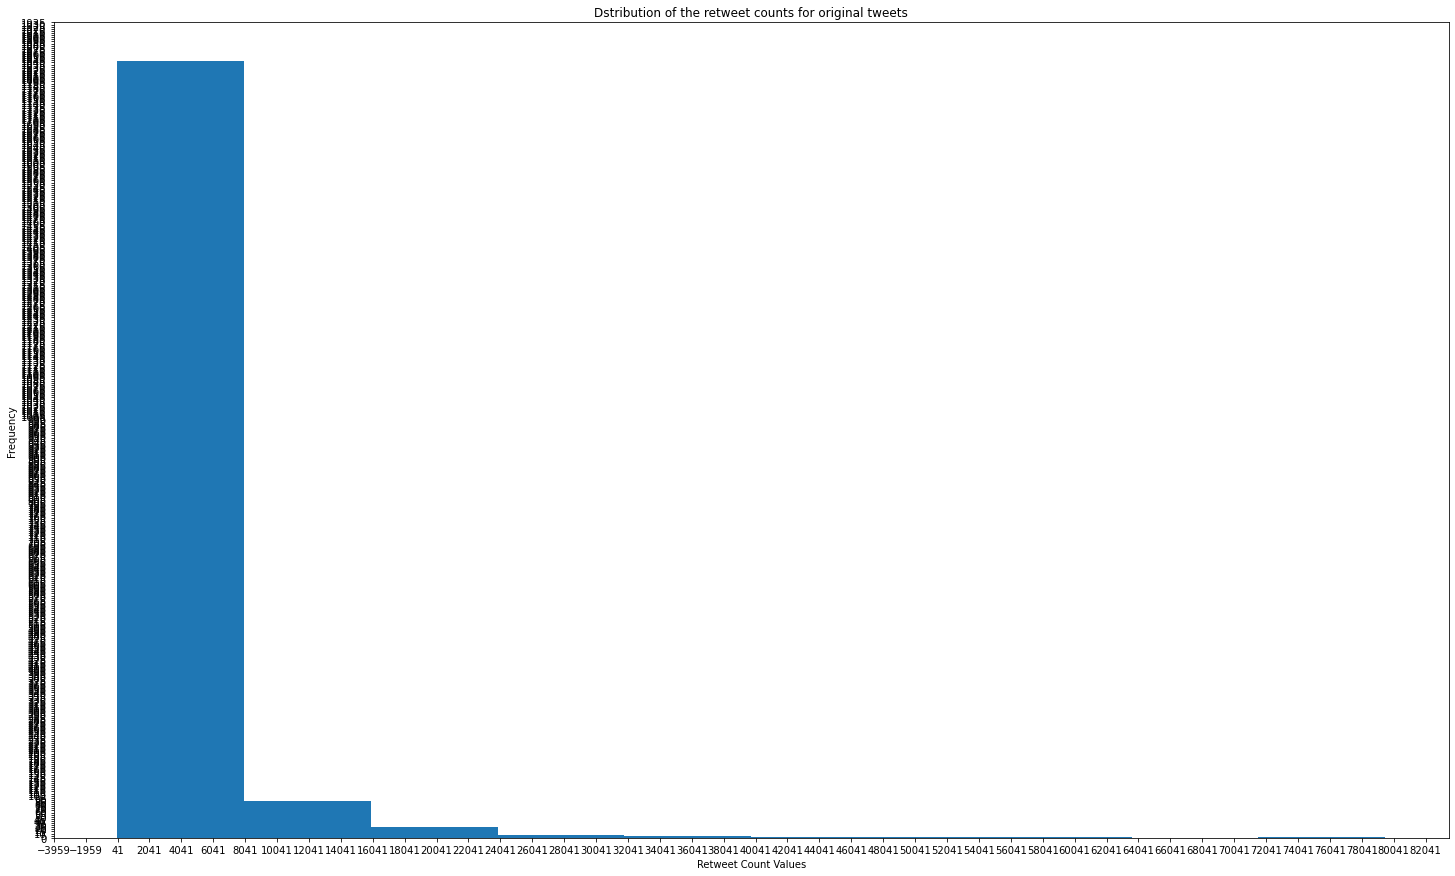

In [653]:
ax = df_tweets.retweet_count.plot(kind='hist', title='Dstribution of the retweet counts for original tweets', figsize=(25, 15))
plt.xlabel('Retweet Count Values')
plt.ylabel('Frequency')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, step=2000))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, step=5))

### We concluded from this graph that the `retweet count` for our original tweets are are `Right-skewed` and are `bulky/centered` at the range from value approx. 16 (min.)  to value approx. 8030

In [646]:
df_tweets.favorite_count.describe()

count      1971.000000
mean       8949.106545
std       12267.799790
min          81.000000
25%        1997.000000
50%        4147.000000
75%       11402.500000
max      132810.000000
Name: favorite_count, dtype: float64

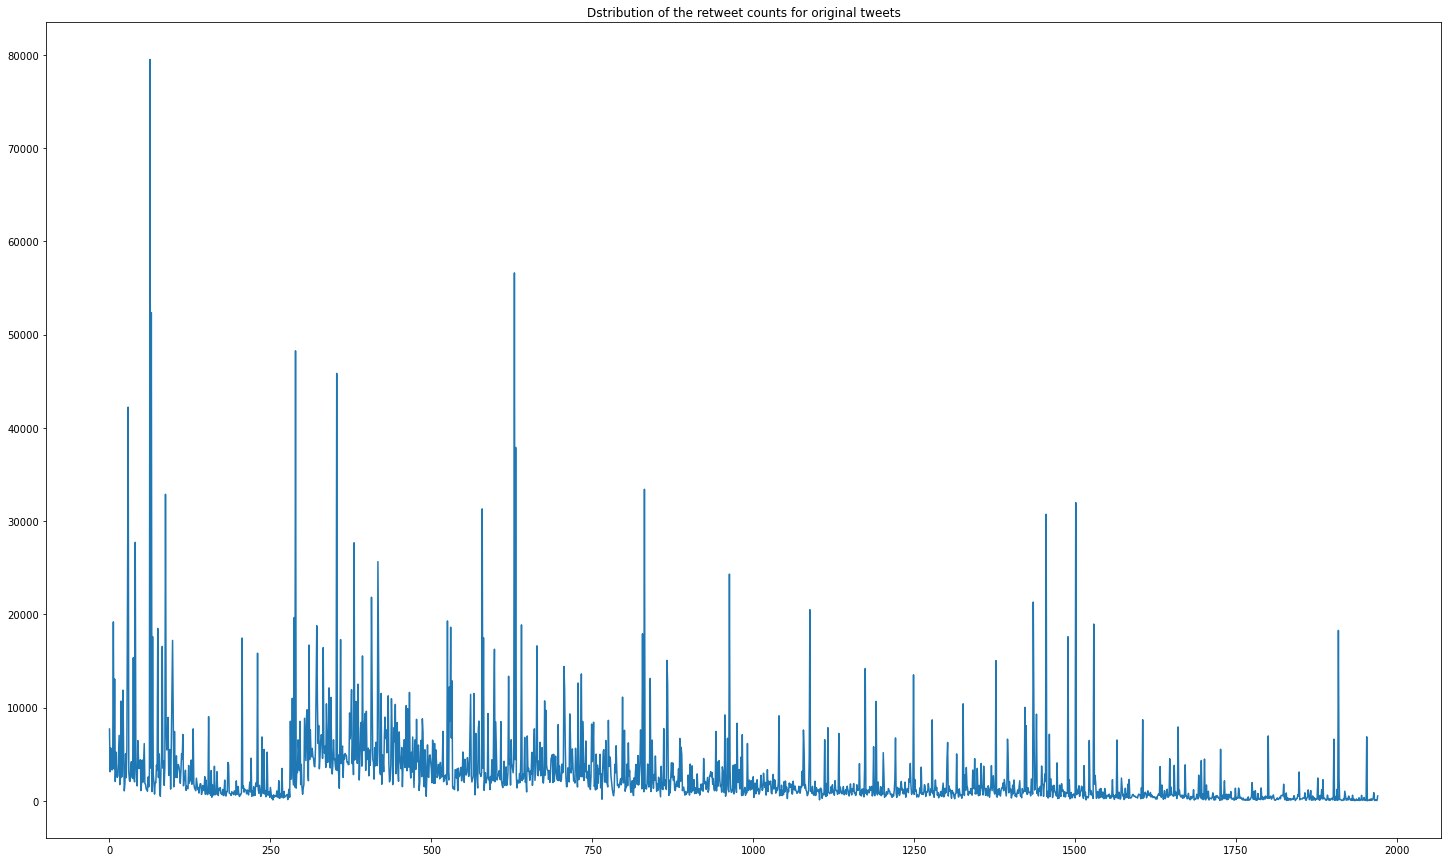

In [656]:
ax = df_tweets.retweet_count.plot(kind='line', title='Dstribution of the retweet counts for original tweets', figsize=(25, 15))

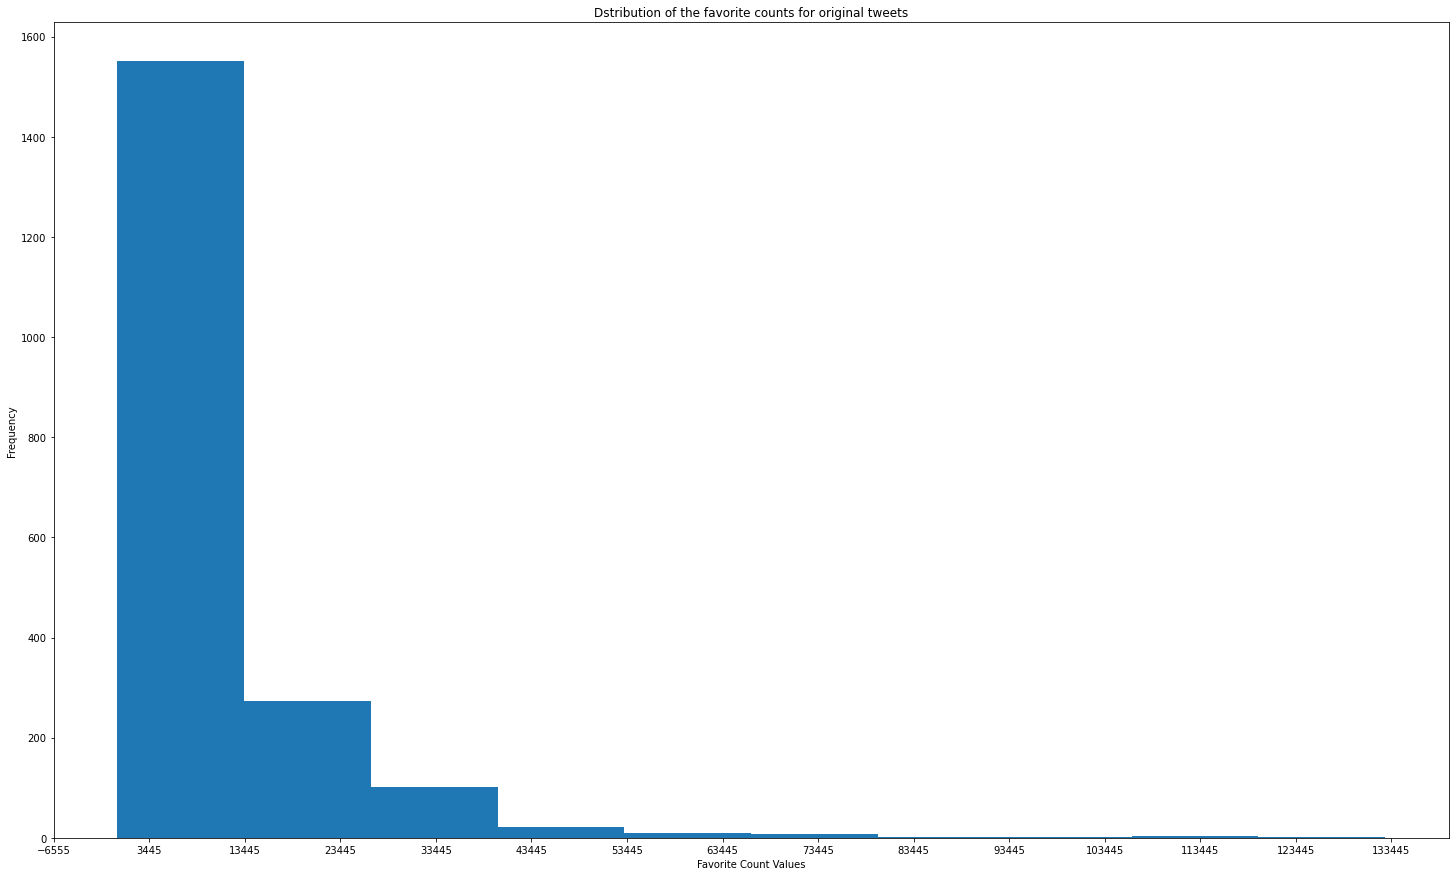

In [664]:
ax = df_tweets.favorite_count.plot(kind='hist', title='Dstribution of the favorite counts for original tweets', figsize=(25, 15))
plt.xlabel('Favorite Count Values')
plt.ylabel('Frequency')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, step=10000))
# start, end = ax.get_ylim()
# ax.yaxis.set_ticks(np.arange(start, end, step=5))

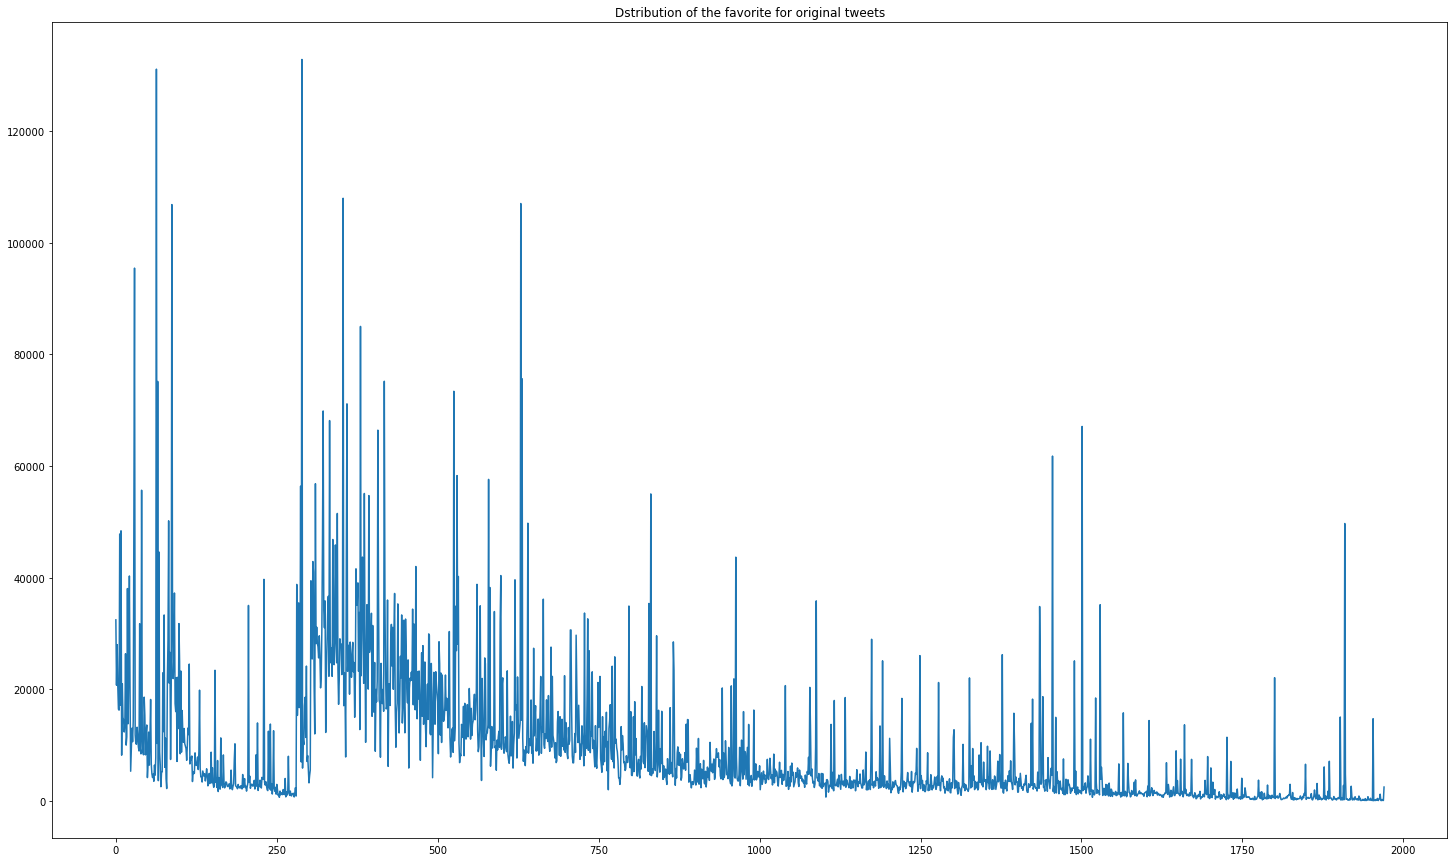

In [665]:
ax = df_tweets.favorite_count.plot(kind='line', title='Dstribution of the favorite for original tweets', figsize=(25, 15))

### We concluded from this graph that the `favorite_count` for our original tweets are are `Right-skewed` and are `bulky/centered` at the range from value approx. 81 (min.)  to value approx. 13445

##### 2nd insight:  Month with the most no. of tweets.

In [680]:
df_tweets.timestamp.dt.month.value_counts()

12    414
11    347
1     232
2     172
3     165
7     137
6     123
5      98
4      94
10     65
9      63
8      61
Name: timestamp, dtype: int64

Text(0, 0.5, 'No. of tweets per each month')

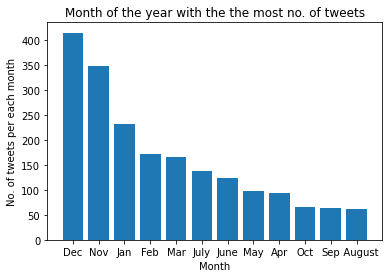

In [684]:
locations = np.arange(1, 13)
labels = ['Dec', 'Nov', 'Jan', 'Feb', 'Mar', 'July', 'June', 'May', 'Apr', 'Oct', 'Sep', '   August']
heights = df_tweets.timestamp.dt.month.value_counts().values
plt.bar(locations, heights, tick_label=labels)
plt.title('Month of the year with the the most no. of tweets')
plt.xlabel('Month') 
plt.ylabel('No. of tweets per each month')

####  December = 12 has the `most number` of tweets & August = 8 has the `minimum` number of tweets of the year.  

In [708]:
df_tweets.retweet_count.mode() # the most repeated number of retweets are 71 retweets.

0      71
1     146
2     516
3     542
4     577
5     748
6     819
7    1124
8    1972
9    3652
dtype: int64

In [709]:
df_tweets.favorite_count.mode()  # most repeated number of favorited tweets are 345.

0     345
1     610
2    1691
3    2176
4    2706
5    2768
6    2918
dtype: int64

#### 3rd insight: Information about tweets that are most retweeted, then to know the prediction of the dog breed that was most retweeted.

it's detected as: Labrador retreiver, whippet with a true dog_breed prediction.

In [737]:
max_val = df_tweets.retweet_count.describe()['max']

In [738]:
df_most_retweeted = df_tweets[df_tweets.retweet_count == max_val]

In [739]:
df_most_retweeted

,tweet_id,timestamp,source_tweet,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
63,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,79515,131075,https://twitter.com/dog_rates/status/744234799...


In [740]:
df_most_retweeted = pd.merge(df_most_retweeted, df_images, on='tweet_id', how='inner')

In [753]:
df_most_retweeted

,tweet_id,timestamp,source_tweet,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,first_prediction,predict_confidence_1,predict_dog_1,second_prediction,predict_confidence_2,predict_dog_2,third_prediction,predict_confidence_3,predict_dog_3
0,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,79515,131075,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [745]:
df_most_retweeted.first_prediction.values[0]

'Labrador_retriever'

#### Information about the tweet that was most favorited.

it's detected as: Lakeland_terrier, Lakeland_retreiver, Irish_terrier  with a true dog_breed prediction.

In [746]:
fav_count_max = df_tweets.favorite_count.describe()['max']

In [747]:
fav_count_max

132810.0

In [748]:
df_most_favorited = df_tweets[df_tweets.favorite_count == fav_count_max]

In [749]:
df_most_favorited

,tweet_id,timestamp,source_tweet,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,expanded_url
289,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,13,10,None,puppo,48265,132810,https://twitter.com/dog_rates/status/822872901...


In [750]:
df_most_favorited = pd.merge(df_most_favorited, df_images, on='tweet_id', how='inner')

In [754]:
df_most_favorited

,tweet_id,timestamp,source_tweet,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,first_prediction,predict_confidence_1,predict_dog_1,second_prediction,predict_confidence_2,predict_dog_2,third_prediction,predict_confidence_3,predict_dog_3
0,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,13,10,None,puppo,48265,132810,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [752]:
df_most_favorited.expanded_url.values[0]

'https://twitter.com/dog_rates/status/822872901745569793/photo/1'

In [757]:
# df_images[df_images.predict_confidence_1]
max_conf = df_images.predict_confidence_1.describe()['max']

In [760]:
df_images[(df_images.predict_confidence_1 == max_conf) & (df_images.predict_dog_1==False)]

,tweet_id,jpg_url,img_num,first_prediction,predict_confidence_1,predict_dog_1,second_prediction,predict_confidence_2,predict_dog_2,third_prediction,predict_confidence_3,predict_dog_3
1866,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [765]:
df_lakeretreiver = df_images[(df_images.first_prediction=='Lakeland_terrier') & (df_images.predict_dog_1==True)]

In [766]:
df_lakeretreiver

,tweet_id,jpg_url,img_num,first_prediction,predict_confidence_1,predict_dog_1,second_prediction,predict_confidence_2,predict_dog_2,third_prediction,predict_confidence_3,predict_dog_3
152,707411934438625280,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,1,Lakeland_terrier,0.738277,True,Airedale,0.028515,True,giant_schnauzer,0.024876,True
194,687818504314159109,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,1,Lakeland_terrier,0.873029,True,soft-coated_wheaten_terrier,0.060924,True,toy_poodle,0.017031,True
205,685641971164143616,https://pbs.twimg.com/media/CYPjvFqW8AAgiP2.jpg,1,Lakeland_terrier,0.253839,True,Airedale,0.213349,True,three-toed_sloth,0.083834,False
225,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True
270,672988786805112832,https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg,1,Lakeland_terrier,0.836632,True,West_Highland_white_terrier,0.073900,True,wire-haired_fox_terrier,0.038160,True
289,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
682,793180763617361921,https://pbs.twimg.com/media/CwHxsdYVMAAqGCJ.jpg,1,Lakeland_terrier,0.266824,True,Irish_terrier,0.218783,True,Airedale,0.132960,True
729,783821107061198850,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1,Lakeland_terrier,0.265659,True,golden_retriever,0.196414,True,standard_poodle,0.133534,True
882,751937170840121344,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1,Lakeland_terrier,0.424168,True,teddy,0.260562,False,golden_retriever,0.127432,True
1086,711743778164514816,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,1,Lakeland_terrier,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True


In [767]:
df_labradorretreiver = df_images[(df_images.first_prediction=='Labrador_retriever') & (df_images.predict_dog_1==True)]

In [768]:
df_labradorretreiver

,tweet_id,jpg_url,img_num,first_prediction,predict_confidence_1,predict_dog_1,second_prediction,predict_confidence_2,predict_dog_2,third_prediction,predict_confidence_3,predict_dog_3
2,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
17,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,Labrador_retriever,0.315163,True,golden_retriever,0.153210,True,Pekinese,0.132791,True
23,826204788643753985,https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg,2,Labrador_retriever,0.782058,True,golden_retriever,0.156581,True,soft-coated_wheaten_terrier,0.007275,True
52,757393109802180609,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,2,Labrador_retriever,0.787125,True,Chesapeake_Bay_retriever,0.112676,True,Rottweiler,0.048039,True
63,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1851,668204964695683073,https://pbs.twimg.com/media/CUXw3qHWoAAk8HJ.jpg,1,Labrador_retriever,0.655180,True,golden_retriever,0.107884,True,Chesapeake_Bay_retriever,0.065835,True
1858,667924896115245057,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,1,Labrador_retriever,0.209051,True,hog,0.203980,False,Newfoundland,0.165914,True
1886,667502640335572993,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True
1891,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True


In [771]:
df_all_dogs = df_images[(df_images.predict_dog_1==True)&(df_images.predict_dog_3==True)&(df_images.predict_dog_3==True)]

In [772]:
df_all_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1278 non-null   int64  
 1   jpg_url               1278 non-null   object 
 2   img_num               1278 non-null   int64  
 3   first_prediction      1278 non-null   object 
 4   predict_confidence_1  1278 non-null   float64
 5   predict_dog_1         1278 non-null   bool   
 6   second_prediction     1278 non-null   object 
 7   predict_confidence_2  1278 non-null   float64
 8   predict_dog_2         1278 non-null   bool   
 9   third_prediction      1278 non-null   object 
 10  predict_confidence_3  1278 non-null   float64
 11  predict_dog_3         1278 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 103.6+ KB


In [773]:
df_all_dogs.head(1)

,tweet_id,jpg_url,img_num,first_prediction,predict_confidence_1,predict_dog_1,second_prediction,predict_confidence_2,predict_dog_2,third_prediction,predict_confidence_3,predict_dog_3
0,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [777]:
len(df_all_dogs.first_prediction.unique().astype(list))

111

In [778]:
len(df_all_dogs.second_prediction.unique().astype(list))

168

In [780]:
len(df_all_dogs.third_prediction.unique().astype(list))

116

In [781]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source_tweet        1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_stage           1971 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  expanded_url        1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 169.5+ KB


####  Average of rating taken by `LakeLand_retriever` and `Labrador_retriever`..? which dog_breed is liked most? based on the first prediction only.

In [782]:
df_breeds = df_images[(df_images.predict_dog_1==True) & (df_images.predict_dog_2==True) & (df_images.predict_dog_3==True)]
df_breeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1194 non-null   int64  
 1   jpg_url               1194 non-null   object 
 2   img_num               1194 non-null   int64  
 3   first_prediction      1194 non-null   object 
 4   predict_confidence_1  1194 non-null   float64
 5   predict_dog_1         1194 non-null   bool   
 6   second_prediction     1194 non-null   object 
 7   predict_confidence_2  1194 non-null   float64
 8   predict_dog_2         1194 non-null   bool   
 9   third_prediction      1194 non-null   object 
 10  predict_confidence_3  1194 non-null   float64
 11  predict_dog_3         1194 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 96.8+ KB


In [783]:
df_breeds = pd.merge(df_breeds, df_tweets, on='tweet_id', how='inner')

In [784]:
df_breeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 1193
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1194 non-null   int64              
 1   jpg_url               1194 non-null   object             
 2   img_num               1194 non-null   int64              
 3   first_prediction      1194 non-null   object             
 4   predict_confidence_1  1194 non-null   float64            
 5   predict_dog_1         1194 non-null   bool               
 6   second_prediction     1194 non-null   object             
 7   predict_confidence_2  1194 non-null   float64            
 8   predict_dog_2         1194 non-null   bool               
 9   third_prediction      1194 non-null   object             
 10  predict_confidence_3  1194 non-null   float64            
 11  predict_dog_3         1194 non-null   bool               
 12  timest

In [799]:
df_breeds_average = df_breeds.groupby('first_prediction')[['rating_numerator', 'retweet_count', 'favorite_count']].mean()

In [801]:
df_breeds_rating = df_breeds_average.loc[:, ['rating_numerator']]

In [802]:
df_breeds_rating

,rating_numerator
first_prediction,
Afghan_hound,8.000000
Airedale,10.200000
American_Staffordshire_terrier,11.000000
Appenzeller,9.000000
Australian_terrier,11.500000
...,...
toy_poodle,11.269231
toy_terrier,11.000000
vizsla,10.800000


Text(0, 0.5, 'numerator rating out of 10')

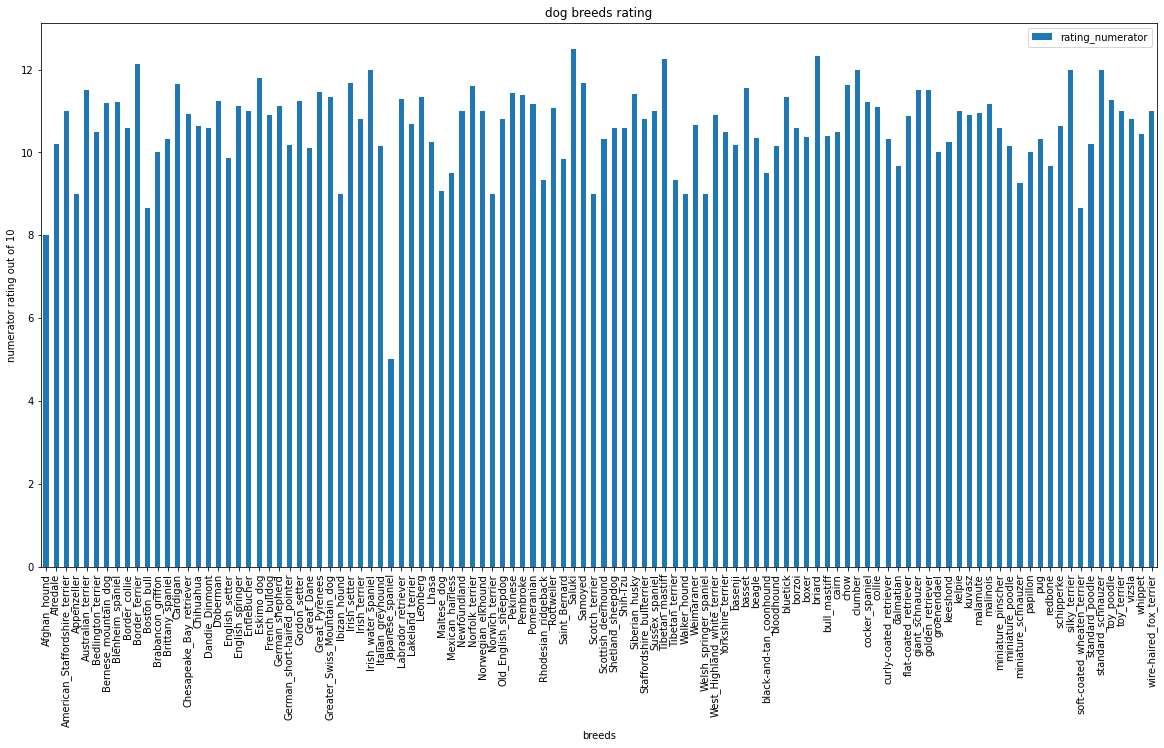

In [806]:
df_breeds_rating.plot(kind='bar', title='dog breeds rating', figsize=(20, 10))
plt.xlabel('breeds')
plt.ylabel('numerator rating out of 10')

In [807]:
df_breeds_favorite = df_breeds_average.loc[:, ['favorite_count']]
df_breeds_favorite

,favorite_count
first_prediction,
Afghan_hound,12191.500000
Airedale,6163.800000
American_Staffordshire_terrier,7559.538462
Appenzeller,2594.000000
Australian_terrier,11127.500000
...,...
toy_poodle,8313.153846
toy_terrier,4497.000000
vizsla,6743.500000


Text(0, 0.5, 'favorite counts per each breed')

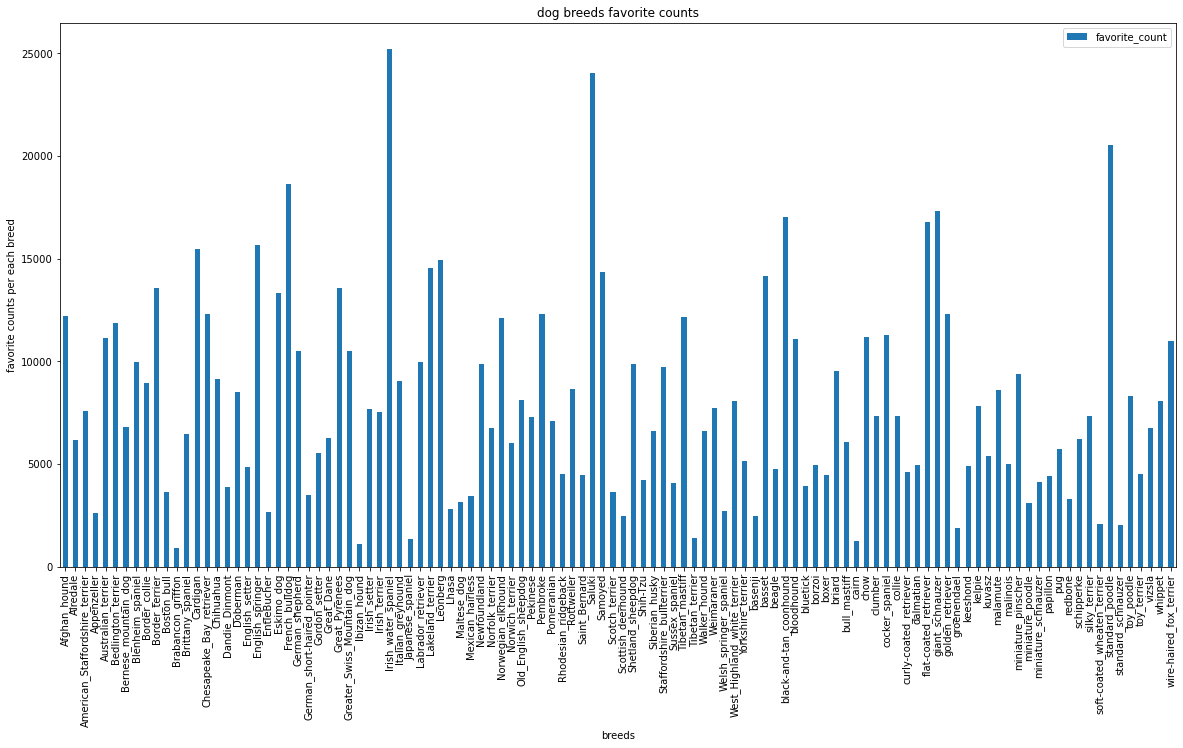

In [808]:
df_breeds_favorite.plot(kind='bar', title='dog breeds favorite counts', figsize=(20, 10))
plt.xlabel('breeds')
plt.ylabel('favorite counts per each breed')

#####  The most favorited dog breed is: `Irish water spaniel`
      The most rating out of 10 is: `Saluki`
      

In [811]:
df_breeds_average.loc[['Labrador_retriever', 'Lakeland_terrier'], :]

,rating_numerator,retweet_count,favorite_count
first_prediction,,,
Labrador_retriever,11.297297,2665.108108,9982.527027
Lakeland_terrier,10.692308,5239.076923,14554.615385


#### `Labrador_retriever` has higher average rating, but
#### `Lakeland_terrier` has a higher favorite count.